In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [29]:
filas = []
with open('boston_corrected.txt', 'r') as file:
    for line in file:
        if(not(line[0].isalpha() or line[0].isspace())):
            line = line.split("\t")
            filas.append(line)
filas

[['1',
  'Nahant',
  '0',
  '2011',
  '-70.955000',
  '42.255000',
  '24.0',
  '24.0',
  '0.00632',
  '18.0',
  '2.31',
  '0',
  '0.538',
  '6.575',
  '65.2',
  '4.0900',
  '1',
  '296',
  '15.3',
  '396.90',
  '4.98\n'],
 ['2',
  'Swampscott',
  '1',
  '2021',
  '-70.950000',
  '42.287500',
  '21.6',
  '21.6',
  '0.02731',
  '0.0',
  '7.07',
  '0',
  '0.469',
  '6.421',
  '78.9',
  '4.9671',
  '2',
  '242',
  '17.8',
  '396.90',
  '9.14\n'],
 ['3',
  'Swampscott',
  '1',
  '2022',
  '-70.936000',
  '42.283000',
  '34.7',
  '34.7',
  '0.02729',
  '0.0',
  '7.07',
  '0',
  '0.469',
  '7.185',
  '61.1',
  '4.9671',
  '2',
  '242',
  '17.8',
  '392.83',
  '4.03\n'],
 ['4',
  'Marblehead',
  '2',
  '2031',
  '-70.928000',
  '42.293000',
  '33.4',
  '33.4',
  '0.03237',
  '0.0',
  '2.18',
  '0',
  '0.458',
  '6.998',
  '45.8',
  '6.0622',
  '3',
  '222',
  '18.7',
  '394.63',
  '2.94\n'],
 ['5',
  'Marblehead',
  '2',
  '2032',
  '-70.922000',
  '42.298000',
  '36.2',
  '36.2',
  '0.06905',

In [30]:
data = pd.DataFrame(filas, columns=['OBS.', 'TOWN', "TOWN#", 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [31]:
data

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955000,42.255000,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98\n
1,2,Swampscott,1,2021,-70.950000,42.287500,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14\n
2,3,Swampscott,1,2022,-70.936000,42.283000,34.7,34.7,0.02729,0.0,...,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03\n
3,4,Marblehead,2,2031,-70.928000,42.293000,33.4,33.4,0.03237,0.0,...,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94\n
4,5,Marblehead,2,2032,-70.922000,42.298000,36.2,36.2,0.06905,0.0,...,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,Winthrop,91,1801,-70.986000,42.231200,22.4,22.4,0.06263,0.0,...,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67\n
502,503,Winthrop,91,1802,-70.991000,42.227500,20.6,20.6,0.04527,0.0,...,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08\n
503,504,Winthrop,91,1803,-70.994800,42.226000,23.9,23.9,0.06076,0.0,...,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64\n
504,505,Winthrop,91,1804,-70.987500,42.224000,22.0,22.0,0.10959,0.0,...,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48\n


## Columns:
CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000 dollars

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [32]:
data.isnull().sum()

OBS.       0
TOWN       0
TOWN#      0
TRACT      0
LON        0
LAT        0
MEDV       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [33]:
data.keys

<bound method NDFrame.keys of     OBS.        TOWN TOWN# TRACT         LON        LAT  MEDV CMEDV     CRIM  \
0      1      Nahant     0  2011  -70.955000  42.255000  24.0  24.0  0.00632   
1      2  Swampscott     1  2021  -70.950000  42.287500  21.6  21.6  0.02731   
2      3  Swampscott     1  2022  -70.936000  42.283000  34.7  34.7  0.02729   
3      4  Marblehead     2  2031  -70.928000  42.293000  33.4  33.4  0.03237   
4      5  Marblehead     2  2032  -70.922000  42.298000  36.2  36.2  0.06905   
..   ...         ...   ...   ...         ...        ...   ...   ...      ...   
501  502    Winthrop    91  1801  -70.986000  42.231200  22.4  22.4  0.06263   
502  503    Winthrop    91  1802  -70.991000  42.227500  20.6  20.6  0.04527   
503  504    Winthrop    91  1803  -70.994800  42.226000  23.9  23.9  0.06076   
504  505    Winthrop    91  1804  -70.987500  42.224000  22.0  22.0  0.10959   
505  506    Winthrop    91  1805  -70.982500  42.221000  11.9  19.0  0.04741   

       ZN

<AxesSubplot:xlabel='TOWN#', ylabel='CRIM'>

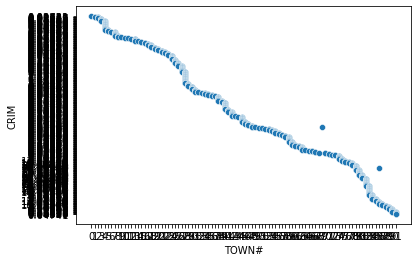

In [38]:
## Visualize the total advertising budget vs Sales
sns.scatterplot(x='TOWN#', y='CRIM', data = data)